<a href="https://colab.research.google.com/github/Dinusha-hue/Deep_Learning_Lab05/blob/main/IT21213212Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [ ]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [ ]:
# Load Data
file_path = '/content/GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [ ]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [ ]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [ ]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [ ]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# After modification
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.3))  # Experiment with dropout for regularization

model.add(LSTM(units=100, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.3))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [ ]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.4522
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1384
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1298
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1243
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1121
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1157
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1067
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0976
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0883
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0952
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0999
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1088
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0952
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0959
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0987
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

In [ ]:
# After modification

model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - loss: 0.4502
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - loss: 0.1532
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - loss: 0.1142
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 0.1331
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 0.1144
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 0.1059
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - loss: 0.1212
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step - loss: 0.1010
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step - loss: 0.1026
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step - loss: 0.1110
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0973
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0963
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.1002
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0948
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0965
Epoch 16/50
3/3 ━━━

In [ ]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step


In [ ]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

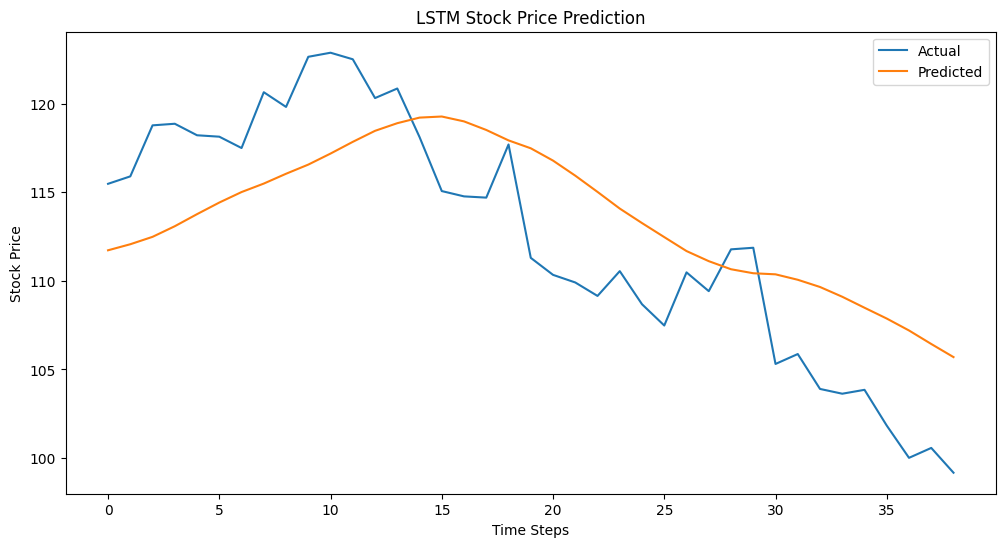

In [ ]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



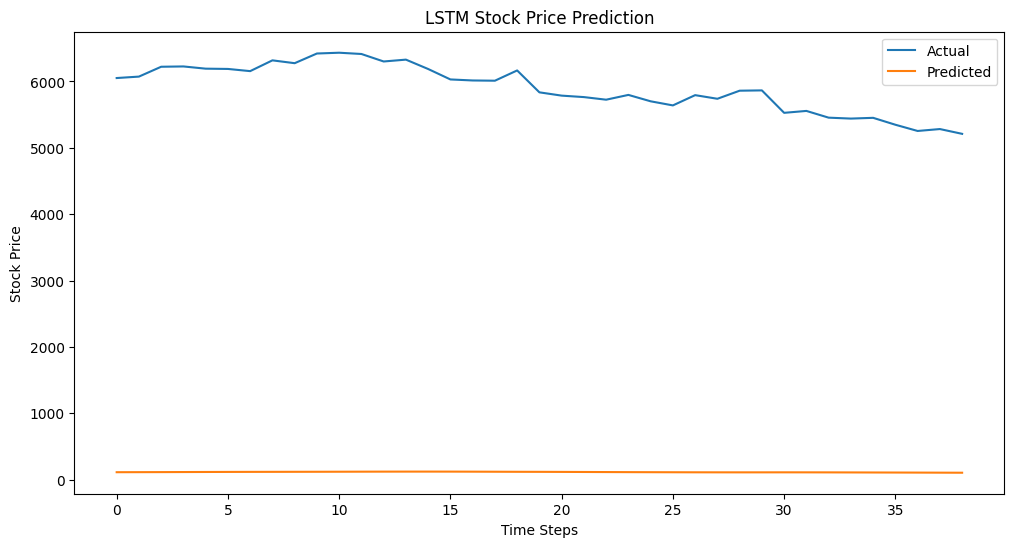

In [ ]:
# After modification
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()


1. What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?

Normalizing the 'Close' prices before feeding them into the LSTM model ensures that the input data is on a similar scale, which helps the model converge faster and perform better. It prevents features with larger numerical ranges from dominating the learning process, allowing the model to learn effectively from all features.

2. What is the purpose of the Dropout layer in the LSTM model?

The purpose of the Dropout layer in the LSTM model is to prevent overfitting by randomly setting a fraction of input units to zero at each update during training. This regularization technique helps the model generalize better by preventing it from relying too heavily on specific neurons, thus improving its ability to handle unseen data.

3. In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?

In the plot showing actual vs. predicted stock prices, if the predicted line closely follows the actual line, it indicates that the model is accurately capturing the underlying trend and patterns in the stock price data. This suggests that the model has learned the temporal dependencies effectively and is making reliable predictions.